In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
files.upload()

Saving BTC-USD(1).csv to BTC-USD(1) (2).csv


{'BTC-USD(1).csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2018-09-30,6604.709961,6643.779785,6566.540039,6625.560059,6625.560059,4002280000\n2018-10-01,6619.850098,6653.299805,6549.080078,6589.620117,6589.620117,4000970000\n2018-10-02,6593.240234,6611.839844,6537.899902,6556.100098,6556.100098,3979260000\n2018-10-03,6553.859863,6571.459961,6454.029785,6502.589844,6502.589844,3887310000\n2018-10-04,6497.910156,6603.310059,6497.910156,6576.689941,6576.689941,3838410000\n2018-10-05,6574.149902,6623.620117,6557.410156,6622.479980,6622.479980,3671500000\n2018-10-06,6622.450195,6628.540039,6577.799805,6588.310059,6588.310059,3259740000\n2018-10-07,6590.680176,6641.490234,6557.040039,6602.950195,6602.950195,3306630000\n2018-10-08,6600.189941,6675.060059,6576.040039,6652.229980,6652.229980,3979460000\n2018-10-09,6653.080078,6661.410156,6606.939941,6642.640137,6642.640137,3580810000\n2018-10-10,6640.290039,6640.290039,6538.959961,6585.529785,6585.529785,3787650000\n2018-10-11,6586.740234,

In [4]:
btc = pd.read_csv('BTC-USD(1).csv')
btc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-30,6604.709961,6643.779785,6566.540039,6625.560059,6625.560059,4.002280e+09
1,2018-10-01,6619.850098,6653.299805,6549.080078,6589.620117,6589.620117,4.000970e+09
2,2018-10-02,6593.240234,6611.839844,6537.899902,6556.100098,6556.100098,3.979260e+09
3,2018-10-03,6553.859863,6571.459961,6454.029785,6502.589844,6502.589844,3.887310e+09
4,2018-10-04,6497.910156,6603.310059,6497.910156,6576.689941,6576.689941,3.838410e+09
...,...,...,...,...,...,...,...
1092,2021-09-26,42721.628906,43919.300781,40848.460938,43208.539063,43208.539063,3.066122e+10
1093,2021-09-27,43234.183594,44313.246094,42190.632813,42235.730469,42235.730469,3.098003e+10
1094,2021-09-28,42200.898438,42775.144531,40931.664063,41034.542969,41034.542969,3.021494e+10
1095,2021-09-29,41064.984375,42545.257813,40829.667969,41564.363281,41564.363281,3.060236e+10


In [5]:
btc.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [6]:
import pandas as pd
from datetime import datetime

btc['Date'] = pd.to_datetime(btc['Date'])

In [7]:
btc.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

Working With Time Series Data

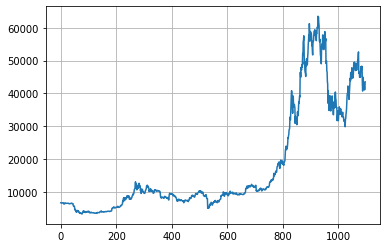

In [8]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
btc['Close'].plot(grid=True)

# Show the plot
plt.show()

Common Financial Analysis

In [9]:
# Assign `Adj Close` to `daily_close`
daily_close = btc[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

      Adj Close
0      0.000000
1     -0.005424
2     -0.005087
3     -0.008162
4      0.011395
...         ...
1092   0.011516
1093  -0.022514
1094  -0.028440
1095   0.012912
1096   0.046654

[1097 rows x 1 columns]
      Adj Close
0           NaN
1     -0.005439
2     -0.005100
3     -0.008195
4      0.011331
...         ...
1092   0.011451
1093  -0.022772
1094  -0.028852
1095   0.012829
1096   0.045599

[1097 rows x 1 columns]


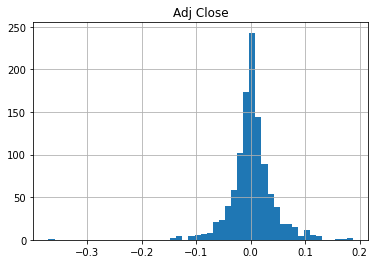

         Adj Close
count  1097.000000
mean      0.002493
std       0.038983
min      -0.371695
25%      -0.014068
50%       0.001252
75%       0.018210
max       0.187465


In [10]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [11]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

      Adj Close
0      1.000000
1      0.994576
2      0.989516
3      0.981440
4      0.992624
...         ...
1092   6.521492
1093   6.374666
1094   6.193370
1095   6.273336
1096   6.566015

[1097 rows x 1 columns]


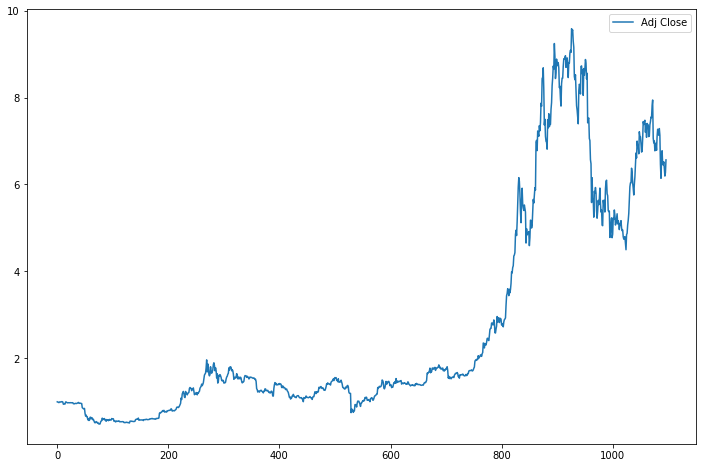

In [12]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

Moving Windows

In [13]:
# Isolate the adjusted closing prices 
adj_close_px = btc['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

1087    47455.579297
1088    47350.108984
1089    47295.062793
1090    47189.881445
1091    47107.684180
1092    47070.513672
1093    47006.377246
1094    46864.301367
1095    46669.931055
1096    46534.881836
Name: Adj Close, dtype: float64

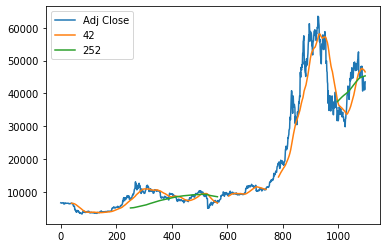

In [14]:
# Short moving window rolling mean
btc['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
btc['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
btc[['Adj Close', '42', '252']].plot()

plt.show()

Volatility Calculation

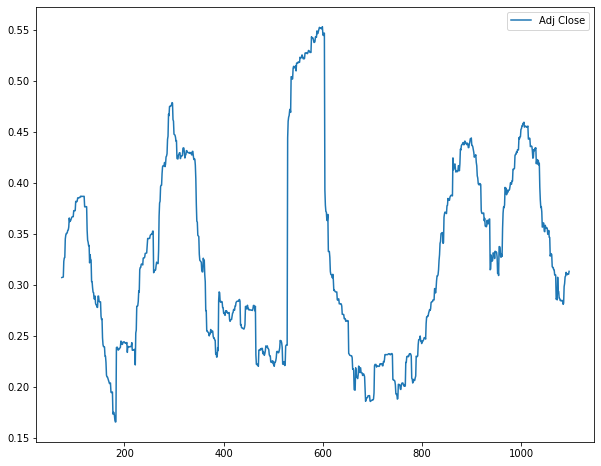

In [15]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_c.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

Building A Trading Strategy With Python

In [16]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=btc.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = btc['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = btc['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

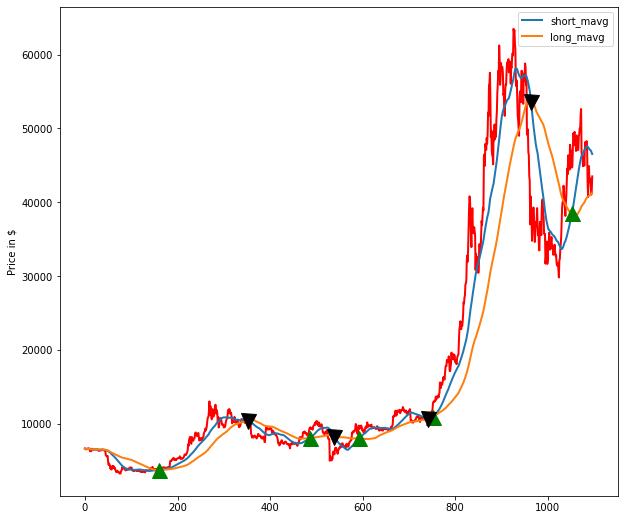

In [26]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
btc['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=15, color='g')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=15, color='k')
plt.rcParams['figure.figsize'] = [10, 9]         
# Show the plot
plt.show()

Backtesting A Strategy
Implementation Of A Simple Backtester With Pandas

In [27]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['btc'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(btc['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(btc['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(btc['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

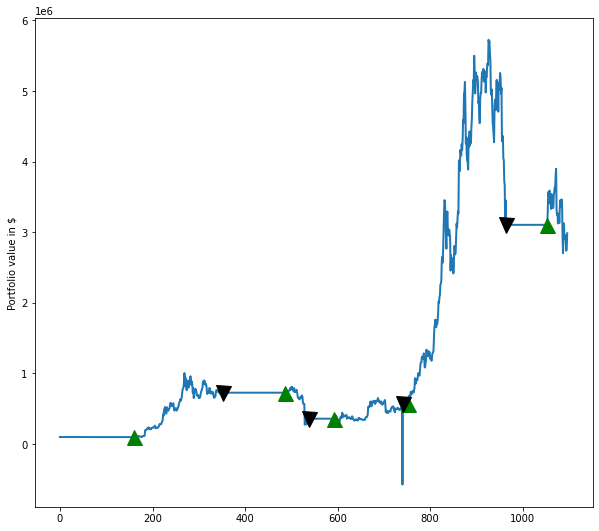

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=15, color='g')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=15, color='k')
plt.rcParams['figure.figsize'] = [10, 9] 
#plt.xlim((datetime.date(2018,9,30),datetime.date(2021,9,30)))
#plt.ylim((100,250))
# Show the plot
plt.show()

Evaluating Moving Average Crossover Strategy
Sharpe Ratio

In [34]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.09671857546915576


Maximum Drawdown

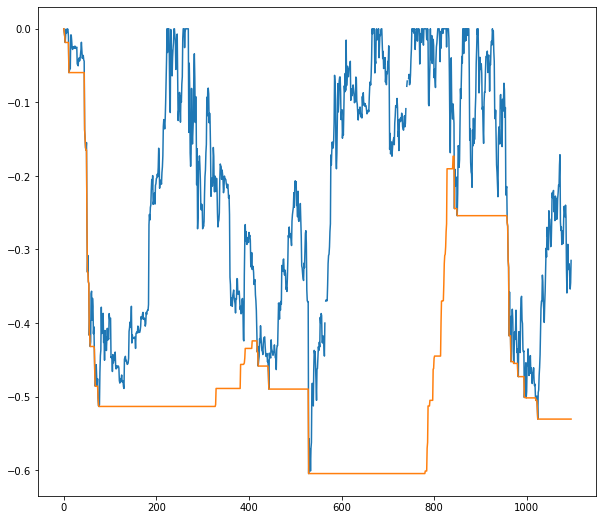

In [36]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = btc['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = btc['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

Compound Annual Growth Rate (CAGR)